In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 4 body levels(classes):
* underweight
* normal weight
* overweight: Overweight is when a person's weight exceeds the appropriate threshold for their height
* obese:while obesity is the condition of having an excess amount of body fat with a BMI of over 30

In [150]:
categorical_attribuites=[
    "Gender",
    "H_Cal_Consump",
    "Alcohol_Consump",
    "Smoking",
    "Food_Between_Meals",
    "Fam_Hist",
    "H_Cal_Burn",
    "Transport",
    "Body_Level"
]
attribuite_description={
        "Gender":"Male or female.",            
        "Age":"Numeric value.",
        "Height":"Numeric value (in meters).",
        "Weight":"Numeric value (in kilograms).",
        "Fam_Hist":"Does the family have a history with obesity?",
        "H_Cal_Consump":"High caloric food consumption.",
        "Veg_Consump":"Frequency of vegetables consumption.",
        "Meal_Count":"Average number of meals per day.",
        "Food_Between_Meals":"Frequency of eating between meals.",
        "Smoking":"Is the person smoking?",
        "Water_Consump":"Frequency of water consumption.",
        "H_Cal_Burn":"Does the body have high calories burn rate?",
        "Phys_Act":"How often does the person do physical activities?",
        "Time_E_Dev":"How much time does person spend on electronic devices.",
        "Alcohol_Consump":"Frequency of alcohols consumption.",
        "Transport":"Which transports does the person usually use?",
    }
code_value={
    
    "Body_Level":{
        "Body Level 1":1,
        "Body Level 2":2,
        "Body Level 3":3,
        "Body Level 4":4,
    },
    "Gender":{
        "Female":0,
        "Male":1
    },
    "H_Cal_Consump":{
        "no":0,
        "yes":1
    },
    "Alcohol_Consump":{
        "no":0,
        "Sometimes":1,
        "Frequently":2,
        "Always":3
    },
    "Smoking":{
        "no":0,
        "yes":1
    },
    "Food_Between_Meals":{
        "no":0,
        "Sometimes":1,
        "Frequently":2,
        "Always":3
    },
    "Fam_Hist":{
        "no":0,
        "yes":1
    },
    "H_Cal_Burn":{
        "no":0,
        "yes":1
    },
    "Transport":{
        "Public_Transportation":0,
        "Automobile":1,
        "Walking":2,
        "Bike":3,
        "Motorbike":4
    }
}

In [151]:
def describe_attribuite(attr):
    print(f"{attr}: {attribuite_description[attr]}")
def is_categorical(attr):
    return attr in categorical_attribuites

In [152]:
def encode_categorical_features(df):
    df_encoded = df.copy()
    for col in df_encoded.columns:
        #print original column name and new column name
        if is_categorical(col):
            if col in code_value.keys():
                df_encoded[col] = df_encoded[col].map(code_value[col])
    return df_encoded

In [155]:
def read_data(file_name='body_level_classification_train.csv'):
    '''
    read data from csv file into pandas dataframe
    labeling categorical data as category type
    separate attributes and classes
    and encode categorical features
    '''
    df = pd.read_csv(file_name)
    df=encode_categorical_features(df)
    attributes = df[df.columns[:-1]]
    class_1_df=df[df['Body_Level']==1].drop(columns=['Body_Level'])
    class_2_df=df[df['Body_Level']==2].drop(columns=['Body_Level'])
    class_3_df=df[df['Body_Level']==3].drop(columns=['Body_Level'])
    class_4_df=df[df['Body_Level']==4].drop(columns=['Body_Level'])
    return df,attributes,class_1_df,class_2_df,class_3_df,class_4_df
df,attributes,class_1_df,class_2_df,class_3_df,class_4_df=read_data()

In [156]:
def check_missing_value():
    '''
    check if there is any missing value in the dataset attributes or classes
    '''
    return attributes.isnull().values.any(), df['Body_Level'].isnull().values.any()
print(f'attributes missing value: {check_missing_value()[0]}')
print(f'classes missing value: {check_missing_value()[1]}')

attributes missing value: False
classes missing value: False


In [157]:
#print len of each class
print(f'len of class 1: {len(class_1_df)}')
print(f'len of class 2: {len(class_2_df)}')
print(f'len of class 3: {len(class_3_df)}')
print(f'len of class 4: {len(class_4_df)}')

len of class 1: 190
len of class 2: 201
len of class 3: 406
len of class 4: 680


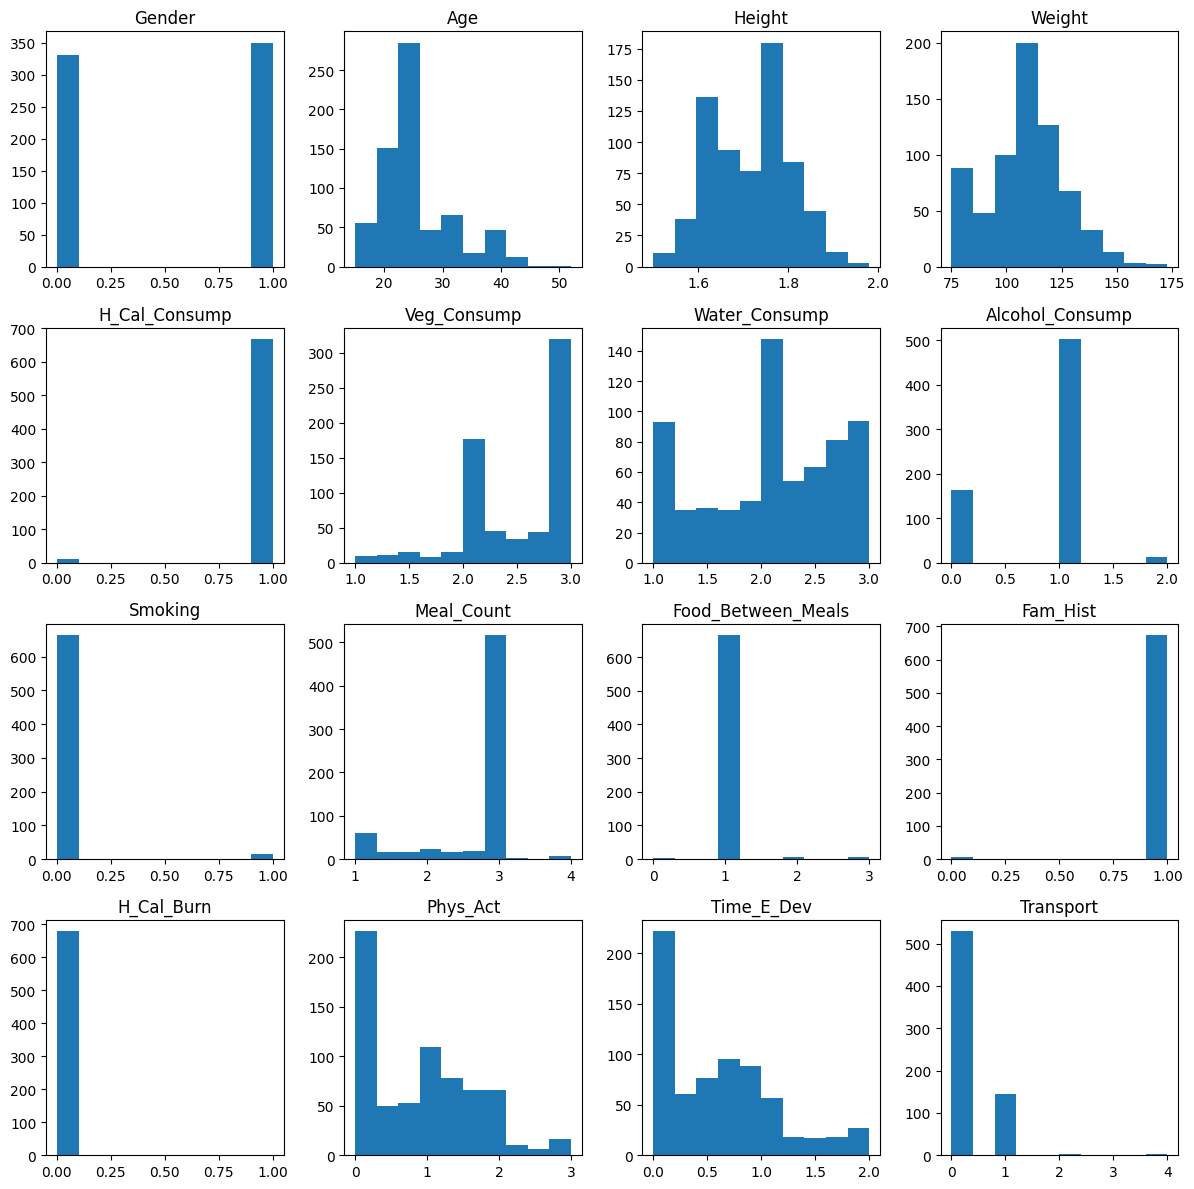

In [159]:
def plot_hist_class(class_num):
    #from df get rows with Body_Level== Body Level class_num
    #and plot histogram for each attribute
    if class_num==1:
        class_df=class_1_df
    elif class_num==2:
        class_df=class_2_df
    elif class_num==3:
        class_df=class_3_df
    else:
        class_df=class_4_df
    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    axs = axs.flatten()
    for i, col in enumerate(class_df.columns):
        axs[i].hist(class_df[col], bins=10)
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()
plot_hist_class(4)
     

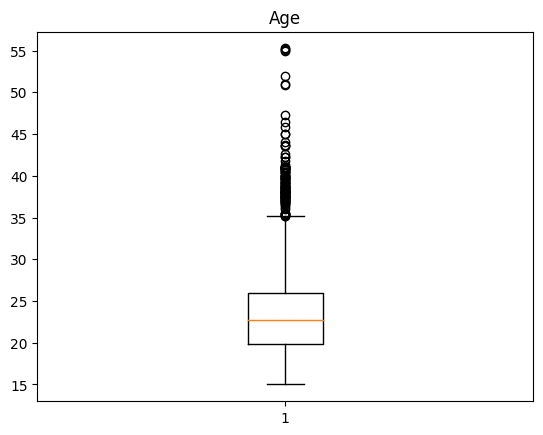

number of outliers in Age: 119
-----------------------------------------------------


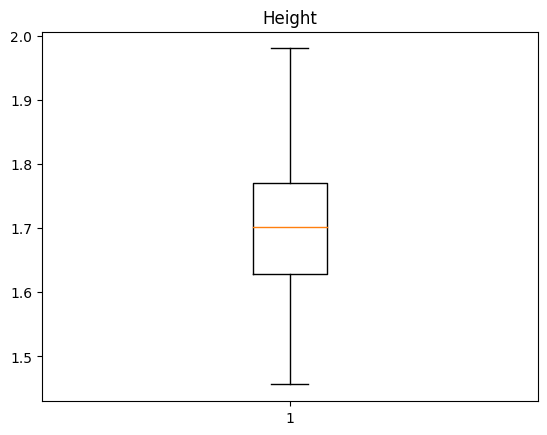

number of outliers in Height: 0
-----------------------------------------------------


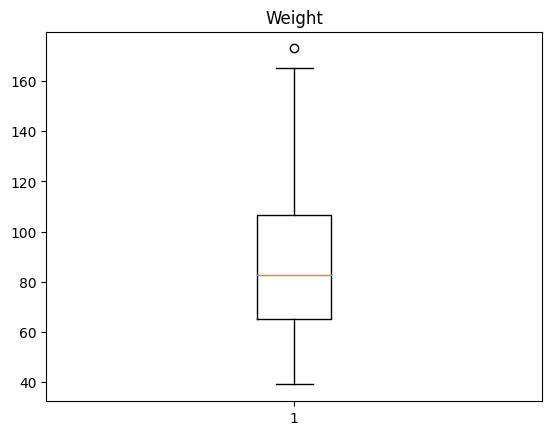

number of outliers in Weight: 1
-----------------------------------------------------


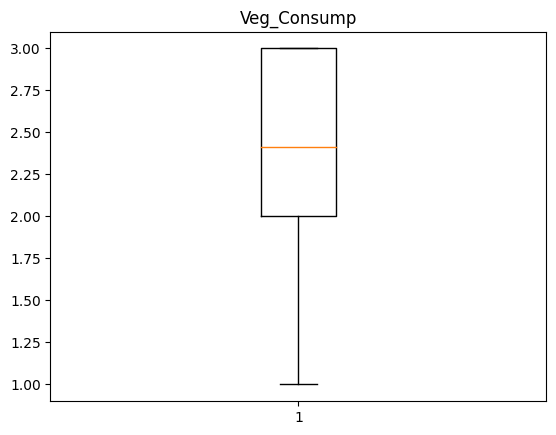

number of outliers in Veg_Consump: 0
-----------------------------------------------------


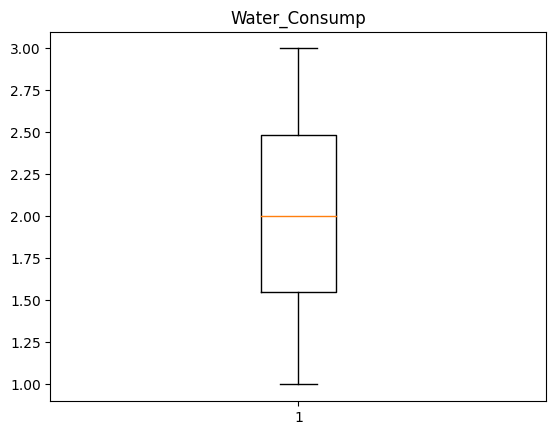

number of outliers in Water_Consump: 0
-----------------------------------------------------


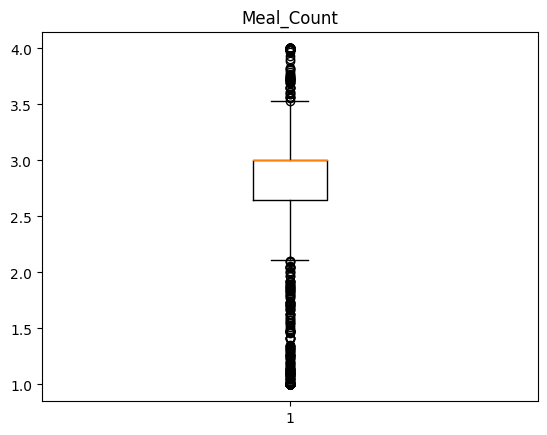

number of outliers in Meal_Count: 405
-----------------------------------------------------


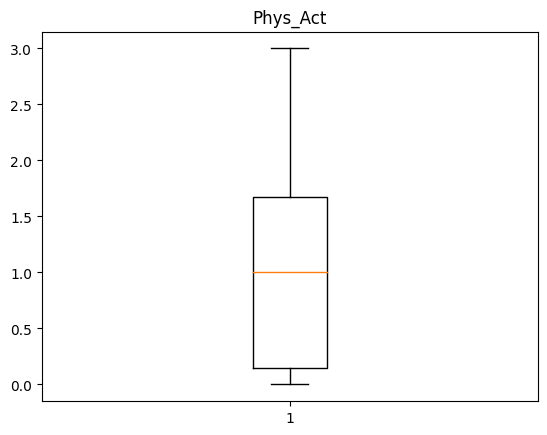

number of outliers in Phys_Act: 0
-----------------------------------------------------


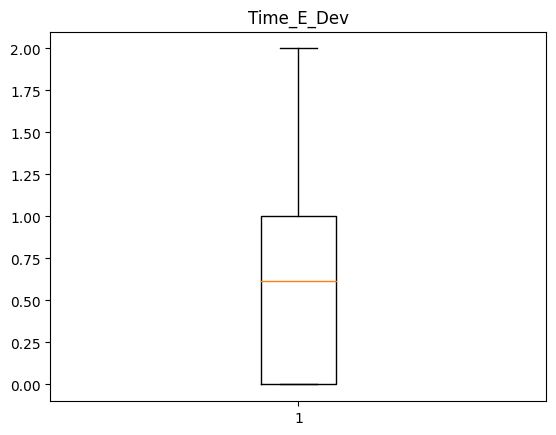

number of outliers in Time_E_Dev: 0
-----------------------------------------------------


In [7]:
def check_outliers():
    for col in attributes.columns:
        if attributes[col].dtype != 'category':
            plt.boxplot(attributes[col])
            plt.title(col)
            plt.show()
            #count number of outliers in each attribute 
            q1 = np.percentile(attributes[col], 25)
            q3 = np.percentile(attributes[col], 75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            print(f'number of outliers in {col}: {len(attributes[(attributes[col] < lower_bound) | (attributes[col] > upper_bound)])}')
            #print line to separate each attribute
            print('-----------------------------------------------------')
check_outliers()

* Age and meals count suffer from outliers
* we need to handle them by removing them or by using robust statistics

In [90]:
def mode_of_attribuite():
    '''
    return most frequent value of each attribute
    '''
    for col in attributes.columns:
        print(f'mode of {col}: {attributes[col].mode()[0]}')
mode_of_attribuite()

mode of Gender: 1
mode of Age: 18.0
mode of Height: 1.7
mode of Weight: 80.0
mode of H_Cal_Consump: 0
mode of Veg_Consump: 3.0
mode of Water_Consump: 2.0
mode of Alcohol_Consump: 1
mode of Smoking: 0
mode of Meal_Count: 3.0
mode of Food_Between_Meals: 1
mode of Fam_Hist: 0
mode of H_Cal_Burn: 0
mode of Phys_Act: 0.0
mode of Time_E_Dev: 0.0
mode of Transport: 0


In [161]:
def classes_probability():
    class_prob = {}
    for c in df['Body_Level'].unique():
        class_prob[c] = len(df[df['Body_Level'] == c]) / len(df)
    return class_prob
class_prob=classes_probability()
for key, value in class_prob.items():
    print(f'probability of class {key}: {value}')

probability of class 1: 0.12863913337846988
probability of class 2: 0.13608666215301288
probability of class 3: 0.27488151658767773
probability of class 4: 0.46039268788083954


* we can conclude that the data is not balanced as the Body Level 4 is the majority class(almost half of the data)
* we need to use oversampling or undersampling to balance the data

In [48]:
def analyze_class(class_number):
    #get rows with Body_Level='Body Level 1'
    class_attr = df[df['Body_Level'] == f'Body Level {class_number}'][df.columns[:-1]]
 

analyze_class(1)
analyze_class(2)
analyze_class(3)
analyze_class(4)

count    1477.000000
mean        0.505078
std         0.500144
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64
count    1477.000000
mean       24.290420
std         6.323081
min        15.000000
25%        19.895877
50%        22.720449
75%        26.000000
max        55.246250
Name: Age, dtype: float64
count    1477.000000
mean        1.701602
std         0.094654
min         1.456346
25%         1.629194
50%         1.701284
75%         1.770278
max         1.980000
Name: Height, dtype: float64
count    1477.000000
mean       86.542290
std        26.278277
min        39.000000
25%        65.000000
50%        82.636162
75%       106.690530
max       173.000000
Name: Weight, dtype: float64
count    1477.000000
mean        0.115775
std         0.320064
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: H_Cal_Consump, dtype: float64
count    14

In [36]:
def dummy_model():
        my_predications = []
        for i in range(len(attributes)):
            bmi = attributes['Weight'][i] / (attributes['Height'][i] ** 2)
            if bmi < 18.5:
                my_predications.append('Body Level 1')
            elif bmi < 25:
                my_predications.append('Body Level 2')
            elif bmi < 30:
                my_predications.append('Body Level 3')
            else:
                my_predications.append('Body Level 4')
        #calculate accuracy
        correct = 0
        for i in range(len(classes)):
            if classes[i] == my_predications[i]:
                correct += 1
        print(f'accuracy: {correct / len(classes)}')
dummy_model()

accuracy: 0.987136086662153
